In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [48]:
df = pd.read_csv('NIFTY 50.csv')

In [49]:
df.head()

,Date,Open,High,Low,Close,P/E,P/B,Div Yield %
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25.91,4.63,0.95
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,26.67,4.76,0.92
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,25.97,4.64,0.95
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,26.32,4.70,0.94
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,26.25,4.69,0.94


In [50]:
df['Prev Close'] = df['Close'].shift()
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [51]:
df.head()

,Date,Open,High,Low,Close,P/E,P/B,Div Yield %,Prev Close
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,26.67,4.76,0.92,1592.2
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,25.97,4.64,0.95,1638.7
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,26.32,4.70,0.94,1595.8
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,26.25,4.69,0.94,1617.6
5,2000-01-10,1615.65,1662.10,1614.95,1632.9,26.57,4.74,0.93,1613.3


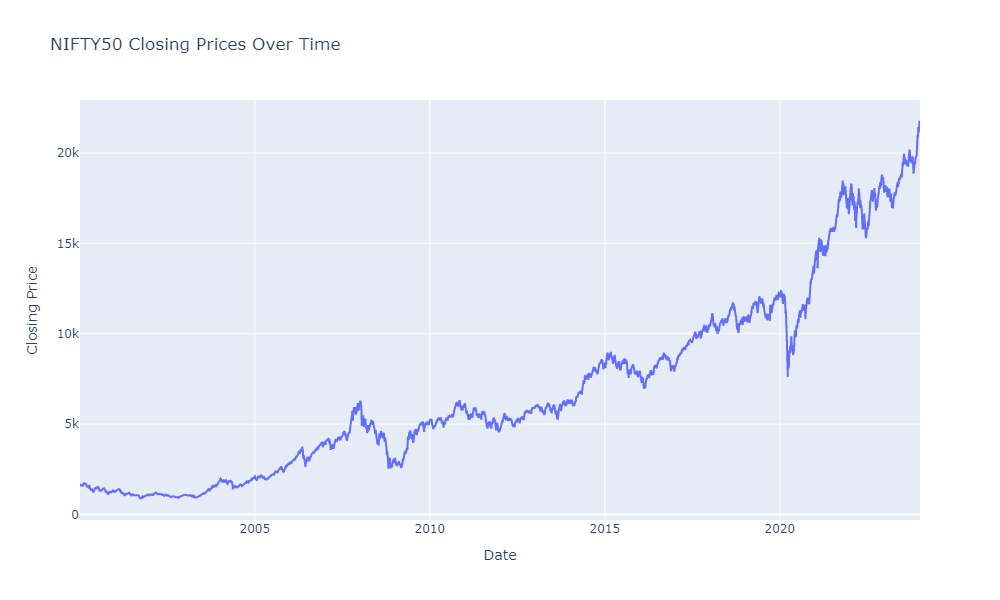

In [67]:
from IPython.display import Image, display
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Price'))
fig.update_layout(
    title='NIFTY50 Closing Prices Over Time',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    width=1000, 
    height=600
)


fig.write_image("index_closing_prices.png", engine='orca')

display(Image(filename='index_closing_prices.png'))

In [53]:
X = df[['Open', 'Prev Close','High','Low']].values
y = df['Close'].values

In [54]:
split_index = int(0.70 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [56]:
def gradient_descent(m1_now, m2_now, m3_now, m4_now, b_now, X_train, y_train, L):
    m1_gradient = 0
    m2_gradient = 0
    m3_gradient = 0
    m4_gradient = 0
    b_gradient = 0
    n = len(X_train)
    
    for i in range(n):
        x1 = X_train[i, 0]  
        x2 = X_train[i, 1]  
        x3 = X_train[i, 2]  
        x4 = X_train[i, 3]  
        y = y_train[i]
        
        y_pred = m1_now * x1 + m2_now * x2 + m3_now * x3 + m4_now * x4 + b_now
        
        m1_gradient += -(2/n) * x1 * (y - y_pred)
        m2_gradient += -(2/n) * x2 * (y - y_pred)
        m3_gradient += -(2/n) * x3 * (y - y_pred)
        m4_gradient += -(2/n) * x4 * (y - y_pred)
        b_gradient += -(2/n) * (y - y_pred)
     
    m1 = m1_now - L * m1_gradient
    m2 = m2_now - L * m2_gradient
    m3 = m3_now - L * m3_gradient
    m4 = m4_now - L * m4_gradient
    b = b_now - L * b_gradient
    
    return m1, m2, m3, m4, b


In [57]:

m1_now, m2_now, m3_now, m4_now, b_now = 0, 0, 0, 0, 0
learning_rate = 0.001
epochs = 6000

for i in range(epochs):
    m1_now, m2_now, m3_now, m4_now, b_now = gradient_descent(m1_now, m2_now, m3_now, m4_now, b_now, X_train_scaled, y_train, learning_rate)
    
print(f"Updated m1: {m1_now}, m2: {m2_now}, m3: {m3_now}, m4: {m4_now}, b: {b_now}")


Updated m1: 593.301228636933, m2: 592.6986153335486, m3: 598.4583429482942, m4: 599.5650941685614, b: 4109.444271853289


In [58]:
from sklearn.metrics import mean_absolute_error


X_test_scaled = scaler.transform(X_test)


def predict(X, m1, m2, m3, m4, b):
    return m1 * X[:, 0] + m2 * X[:, 1] + m3 * X[:, 2]+ m4 * X[:, 3] + b


y_pred = predict(X_test_scaled, m1_now, m2_now, m3_now, m4_now,b_now)


mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error on the test data: {mae}")


Mean Absolute Error on the test data: 59.87694612345478


In [59]:
residuals = y_test - y_pred

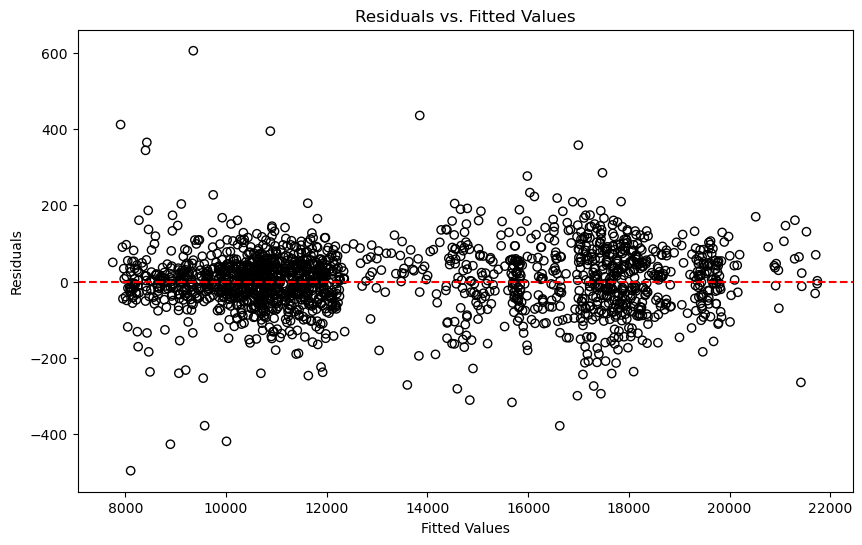

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', facecolors='none')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

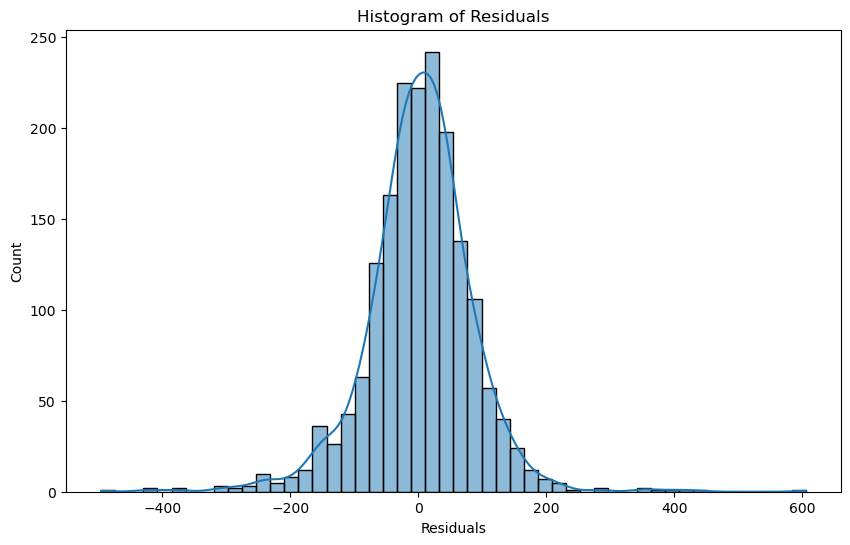

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()


<Figure size 1000x600 with 0 Axes>

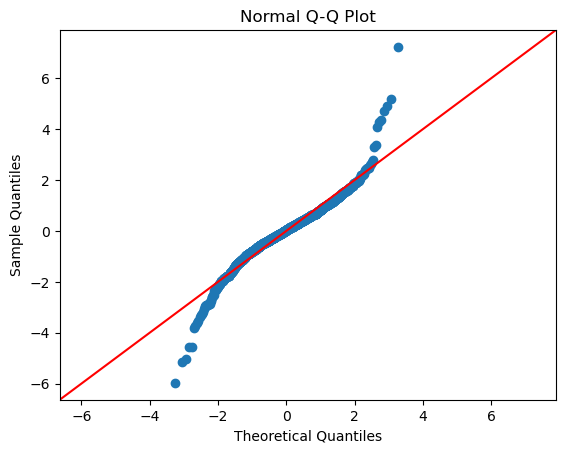

In [62]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

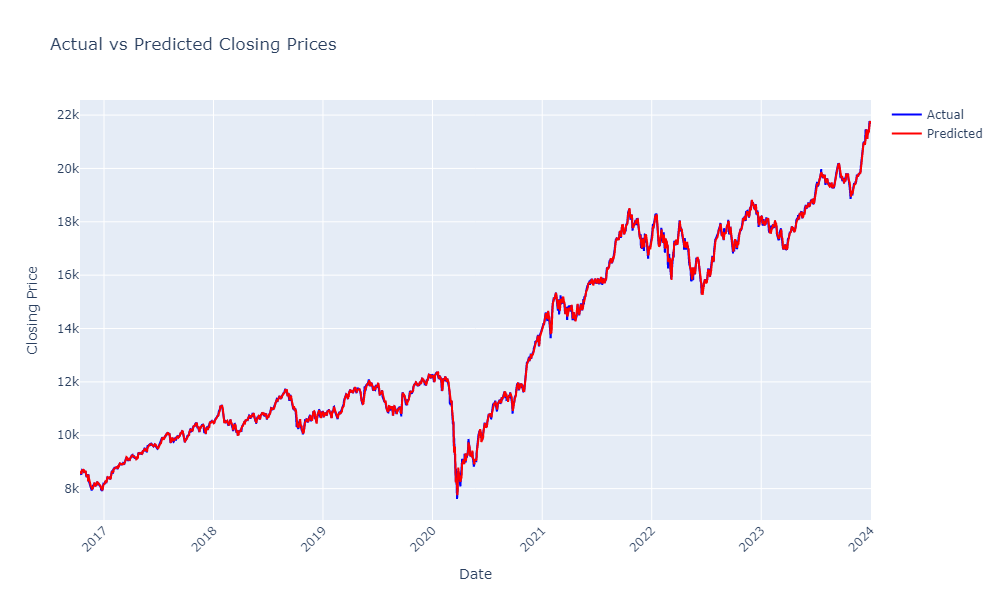

In [70]:



fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'].iloc[split_index:], y=y_test,
                         mode='lines',
                         name='Actual',
                         line=dict(color='blue')))

fig.add_trace(go.Scatter(x=df['Date'].iloc[split_index:], y=y_pred,
                         mode='lines',
                         name='Predicted',
                         line=dict(color='red')))

fig.update_layout(title='Actual vs Predicted Closing Prices',
                  xaxis_title='Date',
                  yaxis_title='Closing Price',
                  width=1000, 
                  height=600,
                  xaxis=dict(tickangle=-45),
                  showlegend=True)



fig.write_image("index_closing_prices1.png", engine='orca')

display(Image(filename='index_closing_prices1.png'))